In [4]:
import numpy as np
import pandas as pd
url="https://github.com/Patilanuj/ML-models/raw/refs/heads/main/Linear_Regression_California_Housing_Prices/housing.csv"
df=pd.read_csv(url)

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

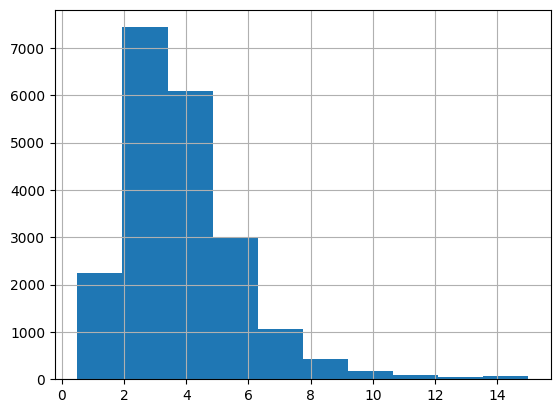

In [9]:
df['median_income'].hist()

In [10]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

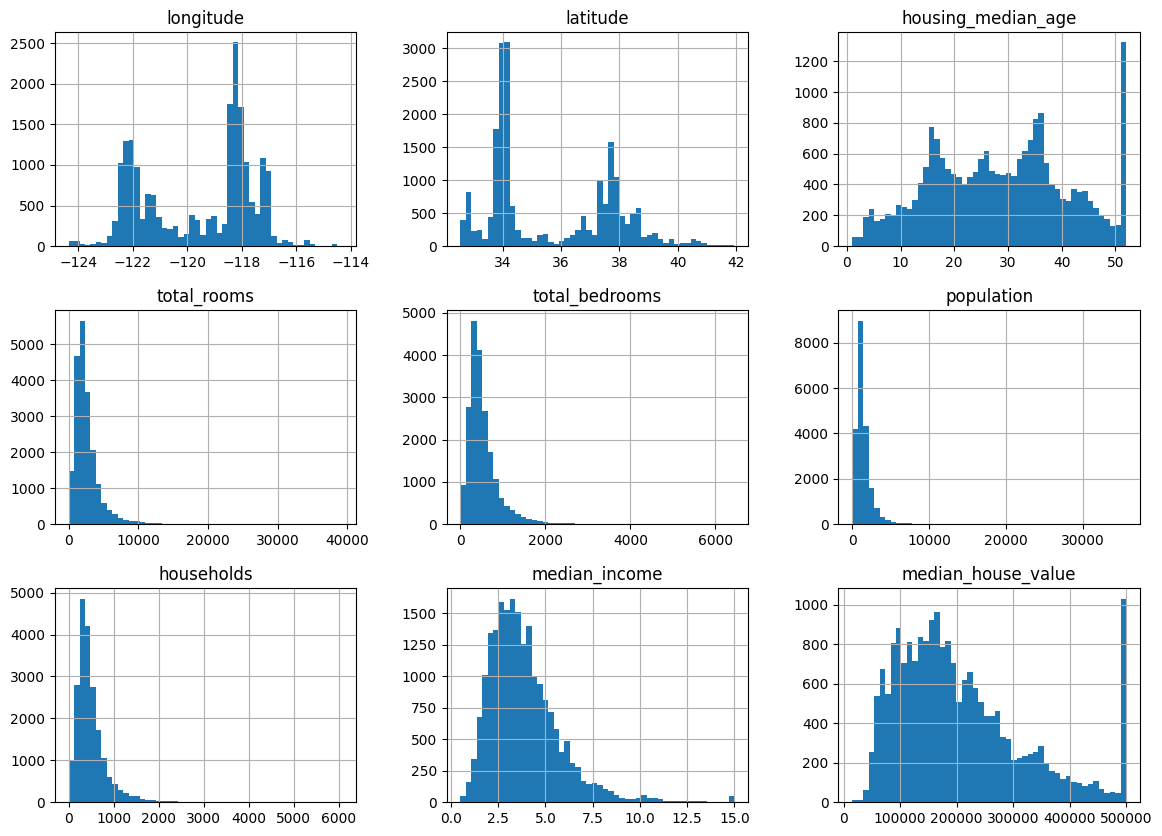

In [11]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(14,10))
plt.show()

Using Histogram we can see distribution of each feature. For Example we can see that in feature named 'median_income' is already scaled.

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [13]:
print(len(train_set))
print(len(test_set))

16512
4128


In [14]:
df['income_cat']=pd.cut(df['median_income'],bins=[0.0,1.5,3.0,4.5,6.0, np.inf],labels=[1,2,3,4,5])

In [15]:
df["income_cat"].value_counts()


income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

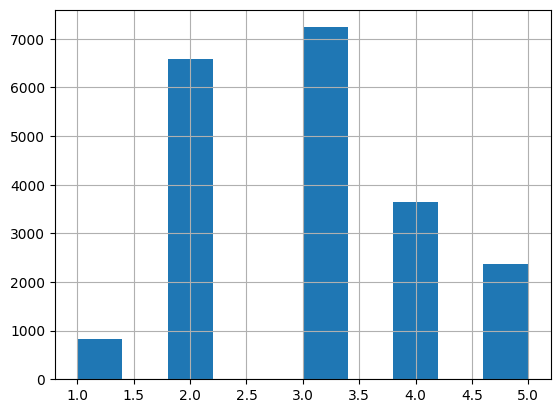

In [16]:
df["income_cat"].hist()


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [18]:
print(len(strat_train_set))
print(len(strat_test_set))


16512
4128


In [19]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [21]:
strat_train_set["ocean_proximity"].value_counts() / len(strat_train_set)

ocean_proximity
<1H OCEAN     0.440710
INLAND        0.318677
NEAR OCEAN    0.128634
NEAR BAY      0.111858
ISLAND        0.000121
Name: count, dtype: float64

In [22]:
strat_test_set["ocean_proximity"].value_counts() / len(strat_test_set)

ocean_proximity
<1H OCEAN     0.450339
INLAND        0.312258
NEAR OCEAN    0.129360
NEAR BAY      0.107316
ISLAND        0.000727
Name: count, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

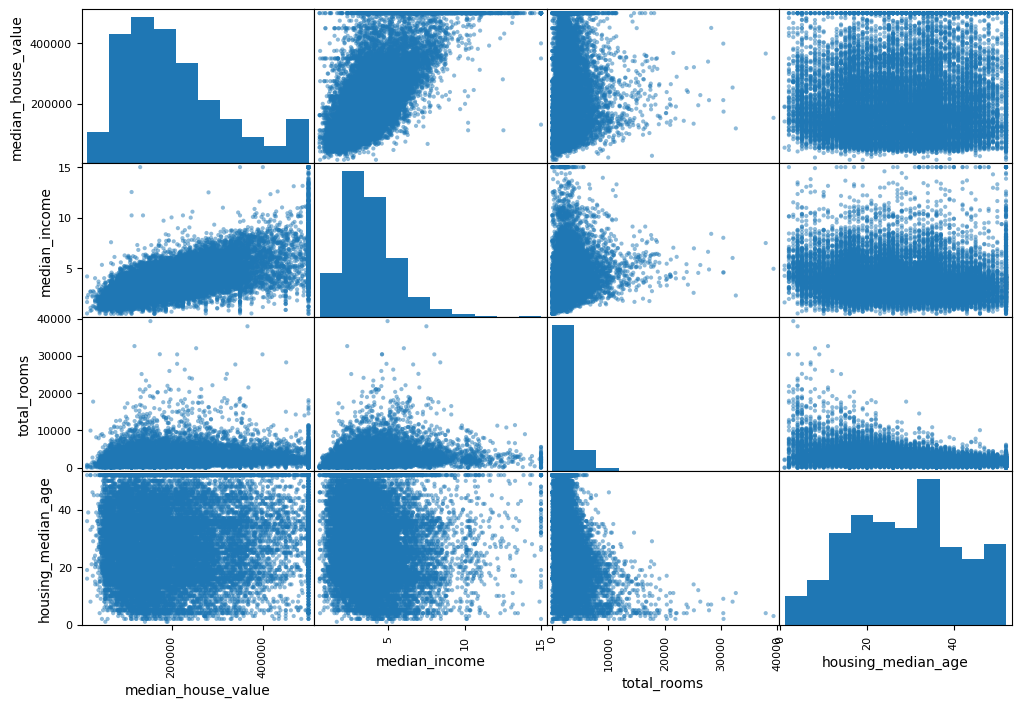

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize = (12,8))

(np.float64(0.0), np.float64(16.0), np.float64(0.0), np.float64(550000.0))

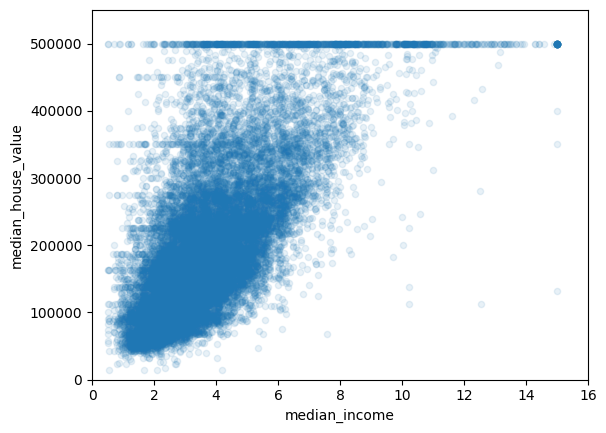

In [24]:
import matplotlib.pyplot as plt

df.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)
plt.axis([0,16,0,550000])

In [40]:
#Train
df = strat_train_set.drop("median_house_value", axis = 1)
df_labels = strat_train_set["median_house_value"].copy()

#Test
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [26]:
# Remove the text attribute because median can only be calucluted in numerical attribute
df_num = df.drop("ocean_proximity", axis = 1)

In [27]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   income_cat          16512 non-null  category
dtypes: category(1), float64(8)
memory usage: 1.1 MB


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [29]:
'''num_pipeline = Pipeline([ 
('imputer', SimpleImputer(strategy= "median")),
('std_scaler', StandardScaler()),
])
df_num_tr = num_pipeline.fit_transform(df_num)'''

'num_pipeline = Pipeline([ \n(\'imputer\', SimpleImputer(strategy= "median")),\n(\'std_scaler\', StandardScaler()),\n])\ndf_num_tr = num_pipeline.fit_transform(df_num)'

In [30]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', KNNImputer(n_neighbors=5))
])

df_num_tr = num_pipeline.fit_transform(df_num)

In [31]:
df_num_tr.shape

(16512, 9)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_attribs = list(df_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline,num_attribs),
    ("cat", OneHotEncoder(),cat_attribs)
])

df_prepared = full_pipeline.fit_transform(df)

In [33]:
df_prepared.shape


(16512, 14)

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
from sklearn.metrics import mean_squared_error

x_test=strat_test_set.drop("median_house_value", axis=1)
y_test=strat_test_set["median_house_value"].copy()

x_test_prepared=full_pipeline.transform(x_test)
final_predictions = lin_reg.predict(x_test_prepared)

final_mse= mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [36]:
final_mse

4507192848.504331

In [37]:
final_rmse

np.float64(67135.63024582647)

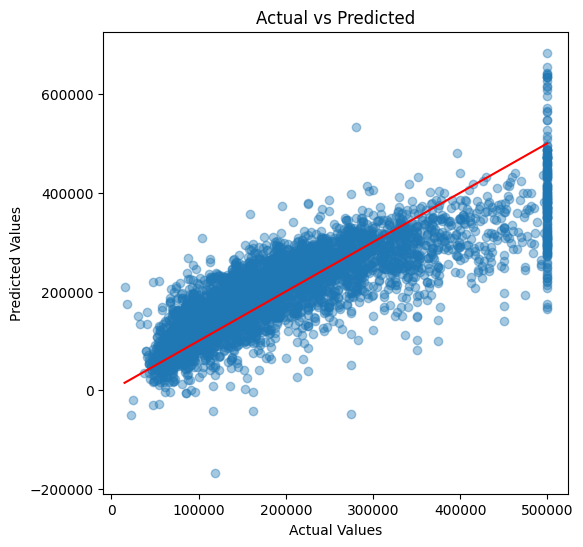

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, final_predictions, alpha=0.4)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")   # perfect prediction line
plt.show()